In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer

In [118]:
df = pd.read_csv('./df_agg_57.csv')
df.shape

(57, 117)

In [119]:
df.head()

,storm,deaths,min_time,max_time,avg_elevation,min_elevation,max_elevation,med_elevation,avg_temperature_2m,min_temperature_2m,...,med_soil_moisture_7_to_28cm,avg_soil_moisture_28_to_100cm,min_soil_moisture_28_to_100cm,max_soil_moisture_28_to_100cm,med_soil_moisture_28_to_100cm,avg_soil_moisture_100_to_255cm,min_soil_moisture_100_to_255cm,max_soil_moisture_100_to_255cm,med_soil_moisture_100_to_255cm,target_cost
0,Georges,16,1998-09-15,1998-10-01,63.60,0.0,1445.0,0.0,26.18,18.2,...,0.0,0.13,0.0,0.52,0.0,0.11,0.0,0.50,0.0,11191.0
1,Isidore,5,2002-09-14,2002-09-27,26.16,0.0,431.0,0.0,25.72,12.3,...,0.0,0.11,0.0,0.49,0.0,0.09,0.0,0.50,0.0,1943.5
2,Lili,2,2002-09-21,2002-10-04,3.77,0.0,77.0,0.0,26.40,21.6,...,0.0,0.06,0.0,0.51,0.0,0.05,0.0,0.44,0.0,1866.6
3,Ivan,57,2004-09-02,2004-09-24,35.21,-2.0,891.0,0.0,25.90,12.1,...,0.0,0.06,0.0,0.52,0.0,0.06,0.0,0.50,0.0,33005.8
4,Dorian,10,2019-08-24,2019-09-09,4.11,0.0,183.0,0.0,25.50,7.7,...,0.0,0.03,0.0,0.43,0.0,0.02,0.0,0.38,0.0,1915.9


In [120]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Check for non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns

missing_values, non_numeric_columns


(storm                             0
 deaths                            0
 min_time                          0
 max_time                          0
 avg_elevation                     0
                                  ..
 avg_soil_moisture_100_to_255cm    0
 min_soil_moisture_100_to_255cm    0
 max_soil_moisture_100_to_255cm    0
 med_soil_moisture_100_to_255cm    0
 target_cost                       0
 Length: 117, dtype: int64,
 Index(['storm', 'min_time', 'max_time'], dtype='object'))

In [121]:
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime

# Convert 'min_time' and 'max_time' to datetime objects
df['min_time'] = pd.to_datetime(df['min_time'])
df['max_time'] = pd.to_datetime(df['max_time'])

# Calculate the duration of the storm
df['duration'] = (df['max_time'] - df['min_time']).dt.days

# Now we can drop 'min_time' and 'max_time' as they've been effectively replaced by 'duration'
df = df.drop(['min_time', 'max_time'], axis=1)

# For 'storm' we'll use one-hot encoding
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid multicollinearity
storm_encoded = encoder.fit_transform(df[['storm']])

# # Create a dfFrame from the one-hot encoded variables
# storm_encoded_df = pd.DataFrame(storm_encoded, columns=encoder.get_feature_names_out(['storm']))

# # Concatenate the original dfFrame and the one-hot encoded df
# df = pd.concat([df, storm_encoded_df], axis=1)

# Drop the original 'storm' column
df = df.drop('storm', axis=1)

# Return the first few rows of the transformed df
df.head()


,deaths,avg_elevation,min_elevation,max_elevation,med_elevation,avg_temperature_2m,min_temperature_2m,max_temperature_2m,med_temperature_2m,avg_relativehumidity_2m,...,avg_soil_moisture_28_to_100cm,min_soil_moisture_28_to_100cm,max_soil_moisture_28_to_100cm,med_soil_moisture_28_to_100cm,avg_soil_moisture_100_to_255cm,min_soil_moisture_100_to_255cm,max_soil_moisture_100_to_255cm,med_soil_moisture_100_to_255cm,target_cost,duration
0,16,63.60,0.0,1445.0,0.0,26.18,18.2,29.4,26.8,88.17,...,0.13,0.0,0.52,0.0,0.11,0.0,0.50,0.0,11191.0,16
1,5,26.16,0.0,431.0,0.0,25.72,12.3,29.7,26.6,89.05,...,0.11,0.0,0.49,0.0,0.09,0.0,0.50,0.0,1943.5,13
2,2,3.77,0.0,77.0,0.0,26.40,21.6,31.8,26.5,86.52,...,0.06,0.0,0.51,0.0,0.05,0.0,0.44,0.0,1866.6,13
3,57,35.21,-2.0,891.0,0.0,25.90,12.1,29.7,26.7,85.13,...,0.06,0.0,0.52,0.0,0.06,0.0,0.50,0.0,33005.8,22
4,10,4.11,0.0,183.0,0.0,25.50,7.7,30.3,26.6,85.38,...,0.03,0.0,0.43,0.0,0.02,0.0,0.38,0.0,1915.9,16


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Columns: 115 entries, deaths to duration
dtypes: float64(99), int64(16)
memory usage: 51.3 KB


In [123]:
na_counts = df.isna().sum()
na_columns = na_counts[na_counts > 0]
na_columns


Series([], dtype: int64)

In [124]:
df.dtypes

deaths                              int64
avg_elevation                     float64
min_elevation                     float64
max_elevation                     float64
med_elevation                     float64
                                   ...   
min_soil_moisture_100_to_255cm    float64
max_soil_moisture_100_to_255cm    float64
med_soil_moisture_100_to_255cm    float64
target_cost                       float64
duration                            int64
Length: 115, dtype: object

In [125]:
df.describe()

,deaths,avg_elevation,min_elevation,max_elevation,med_elevation,avg_temperature_2m,min_temperature_2m,max_temperature_2m,med_temperature_2m,avg_relativehumidity_2m,...,avg_soil_moisture_28_to_100cm,min_soil_moisture_28_to_100cm,max_soil_moisture_28_to_100cm,med_soil_moisture_28_to_100cm,avg_soil_moisture_100_to_255cm,min_soil_moisture_100_to_255cm,max_soil_moisture_100_to_255cm,med_soil_moisture_100_to_255cm,target_cost,duration
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,...,57.000000,57.0,57.000000,57.000000,57.000000,57.0,57.000000,57.000000,57.000000,57.000000
mean,120.526316,46.965263,-0.087719,494.070175,3.622807,24.975263,14.591228,29.936842,25.975439,87.584912,...,0.106491,0.0,0.467193,0.048596,0.110175,0.0,0.443684,0.055439,23822.617544,11.017544
std,454.648887,56.244622,0.391002,391.318735,15.434852,1.504039,5.665443,1.690586,1.257056,1.968414,...,0.058110,0.0,0.067817,0.094386,0.068178,0.0,0.082432,0.107870,39449.810013,4.429976
min,0.000000,0.810000,-2.000000,16.000000,0.000000,20.010000,0.200000,26.200000,20.000000,83.780000,...,0.010000,0.0,0.280000,0.000000,0.000000,0.0,0.170000,0.000000,1050.600000,2.000000
25%,7.000000,17.650000,0.000000,224.000000,0.000000,24.520000,10.700000,28.900000,25.900000,86.390000,...,0.070000,0.0,0.430000,0.000000,0.060000,0.0,0.440000,0.000000,2414.000000,7.000000
50%,27.000000,35.210000,0.000000,396.000000,0.000000,25.500000,14.600000,29.500000,26.300000,87.260000,...,0.100000,0.0,0.480000,0.000000,0.100000,0.0,0.460000,0.000000,8583.200000,11.000000
75%,55.000000,56.330000,0.000000,655.000000,0.000000,25.900000,19.100000,30.800000,26.600000,88.460000,...,0.140000,0.0,0.510000,0.000000,0.140000,0.0,0.470000,0.000000,27393.700000,14.000000
max,2981.000000,381.470000,0.000000,2081.000000,93.000000,26.890000,22.800000,34.900000,27.300000,93.380000,...,0.260000,0.0,0.720000,0.350000,0.330000,0.0,0.660000,0.360000,195046.100000,22.000000


## Feature importance exploration with Random Forest

In [126]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Separate the features (X) from the target (y)
X = df.drop('target_cost', axis=1)
y = df['target_cost']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
rf = RandomForestRegressor(random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for the importances
importances_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
})

# exclude one-hot encoded storm features
non_storm_features = [col for col in X_train.columns if not col.startswith("storm_")]


# Sort the DataFrame by the importances
importances_sorted = importances_df.sort_values(by='importance', ascending=False)

# Return the top 10 important features
importances_sorted.head(10)


,feature,importance
0,deaths,0.669368
67,max_windspeed_100m,0.023041
30,min_pressure_msl,0.020243
113,duration,0.018012
16,med_dewpoint_2m,0.017195
29,avg_pressure_msl,0.015818
32,med_pressure_msl,0.012008
63,max_windspeed_10m,0.009098
73,avg_winddirection_100m,0.008599
86,min_soil_temperature_7_to_28cm,0.008498


### Feature Importance Bar Chart

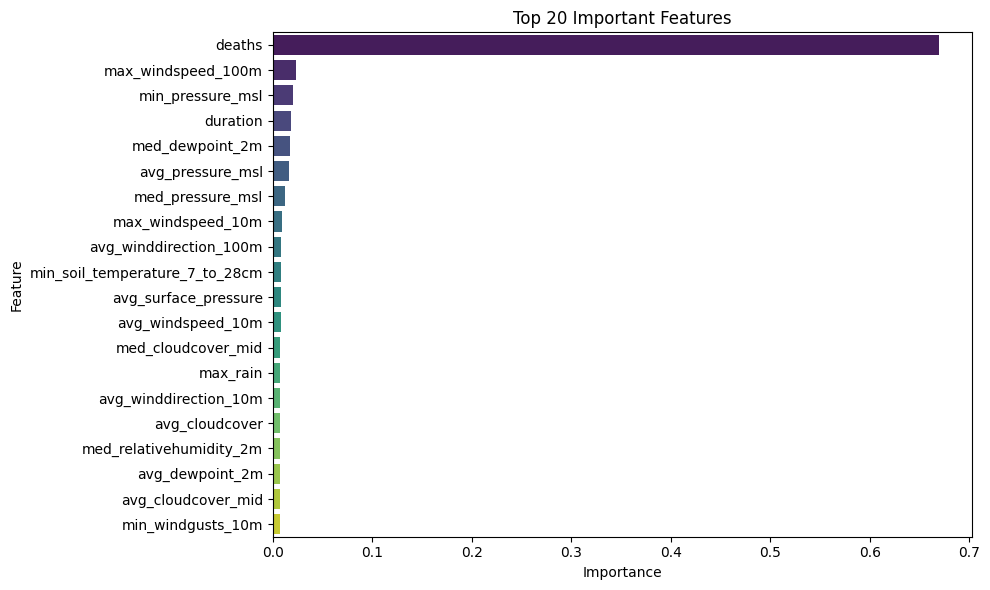

In [127]:
# a bar chart of the feature importances from the Random Forest model. showing top 20 important features.
import matplotlib.pyplot as plt
import seaborn as sns

top_n = 20

top_features = importances_sorted.head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=top_features, palette='viridis')

plt.title(f'Top {top_n} Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Show the plot
plt.tight_layout()
plt.show()


### Partial Dependence Plots

### Correlation Heatmap

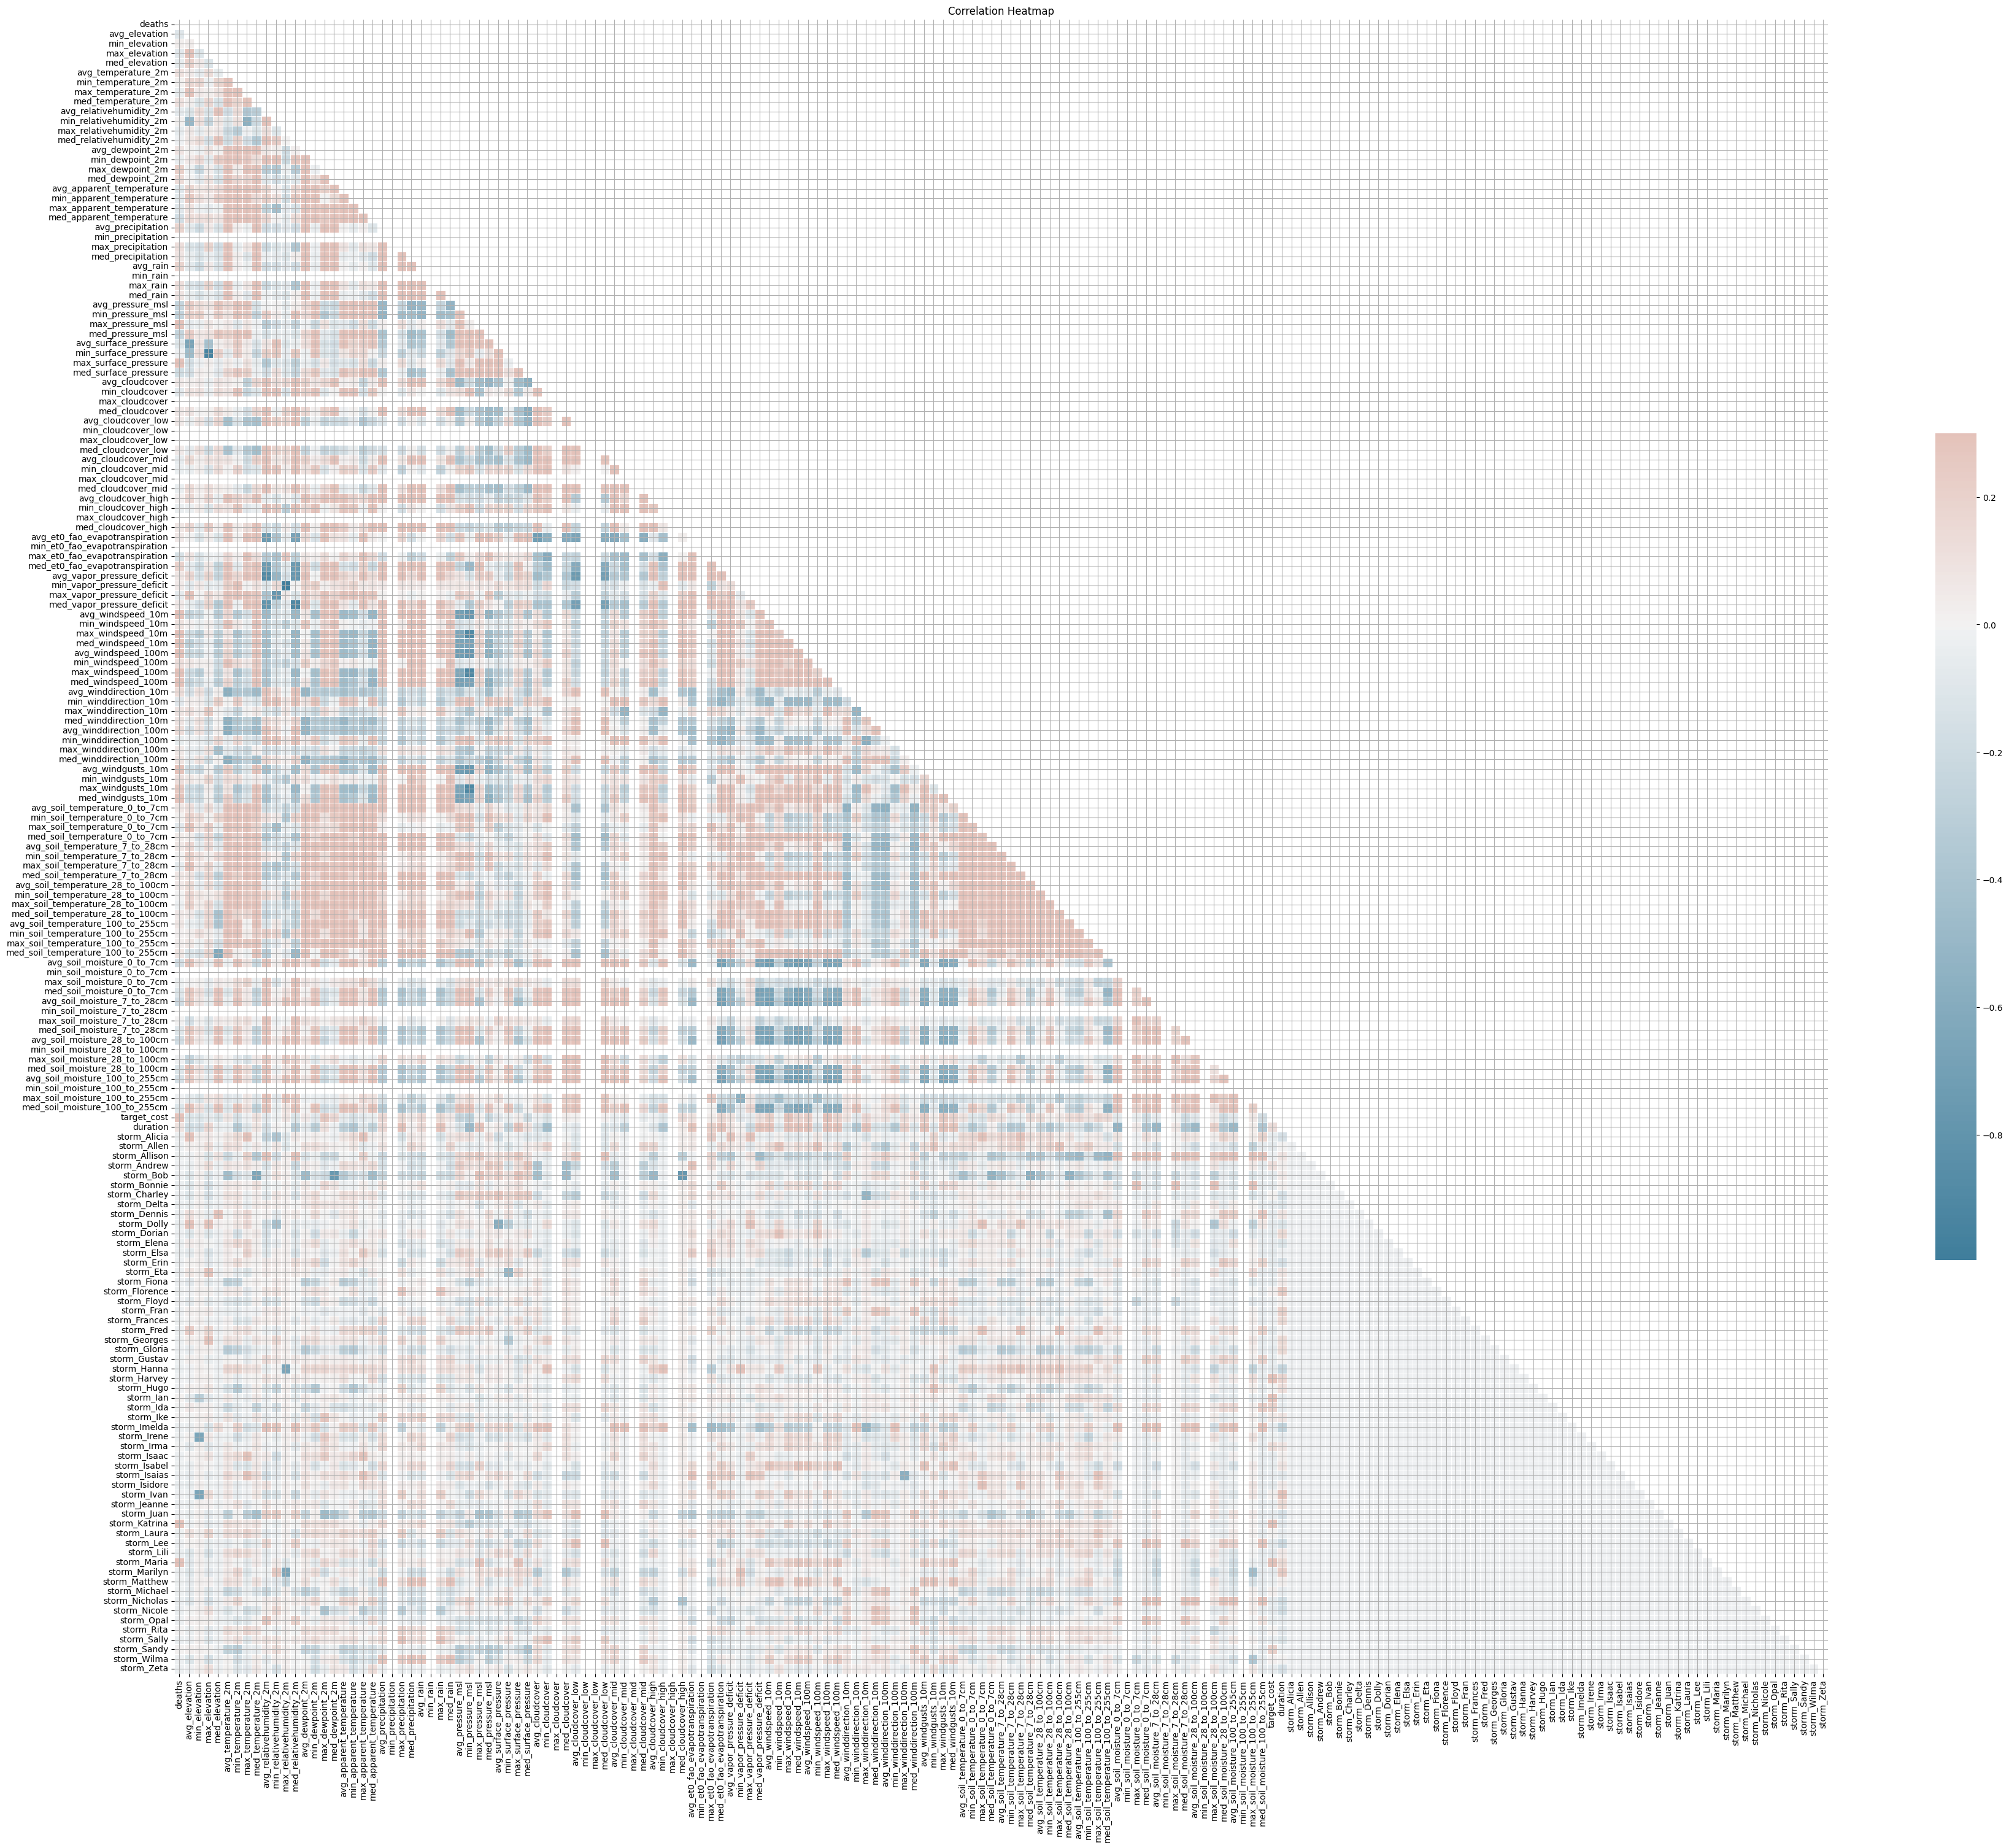

In [62]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(45, 35))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.grid()
# Show plot
plt.title("Correlation Heatmap")
plt.show()
